In [44]:
import numpy as np

In this first part, we just prepare our data (mnist) for training and testing

In [45]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).T
X_test = X_test.reshape(X_test.shape[0], num_pixels).T
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

# Change type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

# split ?
X_train  = X_train / 255
X_test  = X_test / 255


We want to have a binary classification: digit 5 is classified 1 and all the other digits are classified 0

In [46]:
Y_new = np.zeros(Y_train.shape)
Y_new[np.where(Y_train==5.0)[0]] = 1
Y_train = Y_new

In [47]:
Y_new = np.zeros(Y_test.shape)
Y_new[np.where(Y_test==5.0)[0]] = 1
Y_test = Y_new

In [48]:
Y_train = Y_train.T
Y_test = Y_test.T

In [49]:
m = X_train.shape[1] # number of examples

Now, we shuffle the training set

In [50]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:,shuffle_index], Y_train[:,shuffle_index]

Display one image and corresponding label

y[3]=[0.]


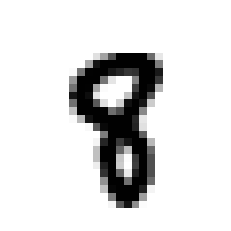

In [51]:
import matplotlib
import matplotlib.pyplot as plt

i = 3
print('y[{}]={}'.format(i, Y_train[:,i]))
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

Let start our work: creating a neural network

First, we just use a single neuron.

1.

In [52]:
def sigmoid(z):
  return 1 / (1 + np.e**-z)

2.

In [53]:
# def neuron(X, W, b):
#   z = 0
#   for i in range(1, len(X)):
#     z += (W[i] * X[i])
#   return z + b

def neuron(X, W, b):
  return np.dot(W, X) + b

In [54]:
W = np.random.uniform(0, 1, len(X_train))
b = 6

In [55]:
z = neuron(X_train, W, b)
z

array([46.86801755, 59.68373925, 64.74056888, ..., 37.46973312,
       50.36619686, 29.53828615])

In [56]:
# sigma 𝝈(z)
Ŷ = sigmoid(z)
Ŷ

array([1., 1., 1., ..., 1., 1., 1.])

3.

In [57]:
import math
# loss
def cross_entropy(Y, Ŷ):
  return Y * np.log(Ŷ) - (1 - Y) * np.log(1 - Ŷ) # L

In [58]:
L = cross_entropy(Y_train, ŷ)
L

/tmp/ipykernel_6946/1224198472.py:4: RuntimeWarning: divide by zero encountered in log
  return Y * np.log(Ŷ) - (1 - Y) * np.log(1 - Ŷ) # L
/tmp/ipykernel_6946/1224198472.py:4: RuntimeWarning: invalid value encountered in multiply
  return Y * np.log(Ŷ) - (1 - Y) * np.log(1 - Ŷ) # L


array([[        inf,         inf,         inf, ...,         inf,
                inf, 29.53786933]])

1.

- compute the gradient ▽L
- compute $\frac{∂L}{∂b}$
- $w = w-\eta▽L$
- $b = b-\eta\frac{∂L}{∂b}$

In [59]:
eta = 0

for i in range(600000):

  eta